In [1]:
import os, sys
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import utilibs as ul

In [2]:
timepoints = pd.read_csv(r"D:\PPMI_UA_2021\Database\timepoints.csv")
source = r"D:\PPMI_UA_2021\Flight Data"

In [3]:
# params = ["n11_rpm", "n12_rpm", "n13_rpm", "n14_rpm"]

storage = {}
disp = [i*250 for i in range(15)]
for ifile, file in enumerate(timepoints.fname.tolist()):
    if ifile in disp:
        print(f"{ifile:4.0f}  ... {file} ...")
    idx1 = int(timepoints.tp114.iloc[ifile])
    idx2 = int(timepoints.tp115.iloc[ifile])
    df = pd.read_csv(source + os.path.sep + file +str(".zip"),compression='zip')
    n13_rpm =  ul.interpnan(df["n13_rpm"][idx1-20:idx2+20])
    n13_rpm = n13_rpm.loc[idx1:idx2].to_numpy() 
    storage[file] = n13_rpm
storage = pd.DataFrame(storage)
storage.to_csv(r"D:\PPMI_UA_2021\Database\n13_rpm.csv", index=False)

   0  ... flight_10054 ...
 250  ... flight_13822 ...
 500  ... flight_17667 ...
 750  ... flight_20737 ...
1000  ... flight_24048 ...
1250  ... flight_29115 ...
1500  ... flight_32197 ...
1750  ... flight_35271 ...
2000  ... flight_39205 ...
2250  ... flight_42954 ...
2500  ... flight_46924 ...
2750  ... flight_50266 ...
3000  ... flight_54148 ...
3250  ... flight_57404 ...
3500  ... flight_61816 ...


In [4]:
df1 = pd.read_csv(r"D:\PPMI_UA_2021\Database\n11_rpm.csv")
df2 = pd.read_csv(r"D:\PPMI_UA_2021\Database\n12_rpm.csv")
df3 = pd.read_csv(r"D:\PPMI_UA_2021\Database\n13_rpm.csv")
df4 = pd.read_csv(r"D:\PPMI_UA_2021\Database\n14_rpm.csv")

n1_avg_rpm = (df1 + df2 + df3 + df4)/4
n1_avg_rpm.to_csv(r"D:\PPMI_UA_2021\Database\n1_rpm.csv", index=False)

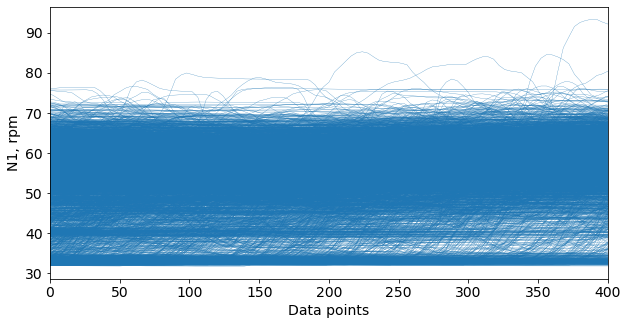

In [3]:
df = pd.read_csv(r"D:\PPMI_UA_2021\Database\Parameter\n1_rpm.csv")
fig, ax = plt.subplots(figsize=(10, 5))
for file in df.columns.tolist():
    ax.plot(df[file].to_numpy(), '-', lw=0.25, color='#1f77b4')
ax.set_xlim([0, 400])
ax.set_ylabel("N1, rpm", fontsize=14)
ax.set_xlabel("Data points", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)

plt.savefig(r"D:\PPMI_UA_2021\n1_rpm.png")

In [6]:
df = pd.read_csv(r"D:\PPMI_UA_2021\Database\n1_rpm.csv")
counter, sampling, duration = 0, 16, 5
min_n1_rpm = 30
n1_flag = []
for ifile, file in enumerate(df.columns.tolist()):
    n1_rpm = df[file].to_numpy()
    for irow, _ in enumerate(n1_rpm):
        if irow >= n1_rpm.shape[0] - sampling * duration:
            n1_flag.append(0)
            break
        else:
            flag = n1_rpm[irow:irow + sampling * duration] <= min_n1_rpm
            if sum(flag) >= sampling * duration:
                n1_flag.append(1)
                print(f"{ifile:4.0f} ... {file} ... Unstable")
                counter += 1
                break
sop_criteria = pd.read_csv(r"D:\PPMI_UA_2021\Database\sop_criteria.csv")
sop_criteria["n1"] = n1_flag
sop_criteria.to_csv(r"D:\PPMI_UA_2021\Database\sop_criteria.csv", index=False)

In [7]:
counter

0